In [26]:
parameter_file = 'params/params.yaml'
import yaml
import sys
import glob
import os
import pandas as pd
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation_gtf']
from __future__ import division
from Bio import motifs
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import transforms

 

colors_scheme = {'G': 'orange', 'A': 'red', 'C': 'blue', 'T': 'darkgreen'}


In [4]:
from Homer import *
%matplotlib inline

In [ ]:
fa_fname = ".fa"

In [ ]:
def build_pssm(fa_file):

In [56]:
pwm = pd.read_csv("Results/nuc_freq_plots/refseq.nuc_freq_200.txt",sep="\t",index_col = 0)
pwm = pwm[["A frequency","C frequency","G frequency","T frequency"]]
pwm = pwm.loc[range(-10,10,1)]
pwm = pwm.transpose()
pwm.to_csv("Results/nuc_freq_plots/refseq.nuc_freq_200.txt.pfm",header=None,index=False,sep='\t')

In [57]:
import motif_analysis

In [58]:
motif_file = ("Results/nuc_freq_plots/refseq.nuc_freq_200.txt.pfm")
with open(motif_file) as handle:
    m = motifs.read(handle, "pfm")

In [8]:
from Bio.Seq import Seq
from Bio import motifs
instances = [Seq("TACAA"),
              Seq("TACGC"),
              Seq("TACAC"),
              Seq("TACCC"),
              Seq("AACCC"),
              Seq("AATGC"),
              Seq("AATGC"),
             ]

m = motifs.create(instances)
#The instances are saved in an attribute m.instances, which is essentially a Python list with some added functionality, as described below. Printing out the Motif object shows the instances from which it was constructed:


#The length of the motif is defined as the sequence length, which should be the same for all instances:


print(m.counts)
#         0      1      2      3      4
# A:   3.00   7.00   0.00   2.00   1.00
# C:   0.00   0.00   5.00   2.00   6.00
# G:   0.00   0.00   0.00   3.00   0.00
# T:   4.00   0.00   2.00   0.00   0.00
#You can access these counts as a dictionary:


        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00



In [27]:
%matplotlib inline
from __future__ import division
from Bio import motifs
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from matplotlib import transforms

 

colors_scheme = {'G': 'orange', 'A': 'red', 'C': 'blue', 'T': 'darkgreen'}

def plotA(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot A"""
    x = np.array([ 0.  ,  0.4 ,  0.6 ,  1.  ,  0.8 ,  0.68,  0.32,  0.2 ,  0.])
    y = np.array([ 0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.3 ,  0.3 ,  0.  ,  0.])
    x = xstart + xscale*x
    y = ystart + yscale*y
    triy =  np.array([0.4 ,   0.4 , 0.75, 0.4])
    trix =  np.array([0.36,   0.64, 0.5, 0.36])

    trix = xstart + xscale*trix
    triy = ystart + yscale*triy
    
    return x, y, trix, triy

def plotT(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot T"""
    x = np.array([ 0. ,  1. ,  1. ,  0.6,  0.6,  0.4,  0.4,  0. ])
    y = np.array([ 1. ,  1. ,  0.9,  0.9,  0. ,  0. ,  0.9,  0.9])
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

def plotG(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot G"""
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 =0.5 + 0.5*np.cos(angle1)
    xl2 =0.5 + 0.5*np.sin(angle2)
    yl2 =0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    
    r1 = np.max(xl1)

    h1 = 0.4
    xadd = np.array([r1,0.5,0.5,r1-0.2,r1-0.2,r1,r1])
    yadd = np.array([h1,h1,h1-0.1,h1-0.1,0,0,h1])
    
    x = np.concatenate((x[::-1],xadd))
    y = np.concatenate((y[::-1],yadd))

    x = xstart + xscale*x
    y = ystart + yscale*y
    
    return x,y

def plotC(xstart=0, ystart=0, xscale=1, yscale=1):
    """Plot C"""
    
    angle1 = np.linspace(0.3+np.pi/2,np.pi,num=100)
    angle2 = np.linspace(np.pi,1.5*np.pi, num=100)
  
    xl1 = 0.5 + 0.5*np.sin(angle1)
    yl1 = 0.5 + 0.5*np.cos(angle1)
    xl2 = 0.5 + 0.5*np.sin(angle2)
    yl2 = 0.5 + 0.5*np.cos(angle2)

    xl = np.concatenate((xl1, xl2))
    yl = np.concatenate((yl1, yl2))

    x = np.concatenate((xl, xl[::-1]))
    y = np.concatenate((yl, 1-yl[::-1]))

    xi1 = 0.5 + 0.35*np.sin(angle1)
    yi1 = 0.5 + 0.35*np.cos(angle1)
    xi1 = xi1[np.where(yi1<=np.max(yl1))]
    yi1 = yi1[np.where(yi1<=np.max(yl1))]
    yi1[0] = np.max(yl1)

    xi2 = 0.5 + 0.35*np.sin(angle2)
    yi2 = 0.5 + 0.35*np.cos(angle2)

    xi = np.concatenate((xi1,xi2))
    yi = np.concatenate((yi1,yi2))

    x1 = np.concatenate((xi,xi[::-1]))
    y1 = np.concatenate((yi,1-yi[::-1]))

    x = np.concatenate((x,x1[::-1]))
    y = np.concatenate((y, y1[::-1]))
    x = xstart + xscale*x
    y = ystart + yscale*y
    return x,y

In [28]:
def approximate_error(motif):
    """Calculate approximate error"""
    pwm = motif.pwm
    bases = list(pwm.keys())
    n = sum(motif.counts[bases[0]])
    approx_error = (len(bases)-1)/(2 * np.log(2) * n)
    return approx_error


def exact_error(motif):
    """Calculate exact error, using multinomial(na,nc,ng,nt)"""
    ## Super Slow. O(n^3)
    pwm = motif.pwm
    bases = list(pwm.keys())
    na = sum(motif.counts['A'])
    n = na
    nc = 0
    ng = 0
    nt = 0
    done = False
    exact_error = 0
    while not done:
        print (na,nc,ng,nt)
        exact_error += sum([-p*np.log2(p) for p in [na/n, nc/n, ng/n, nt/n]])
        if nt<=0:
            ## iterate inner loop            
            if ng > 0:
                ## g => t
                ng = ng - 1
                nt = nt + 1
            elif nc > 0:
                ## c -> g 
                nc = nc - 1;
                ng = ng + 1;
            else:
                ## a->c
                na = na - 1
                nc = nc + 1
        else:
            if ng > 0:
                ## g => t
                ng = ng - 1 
                nt = nt + 1
            elif nc>0:
                ## c => g; all t -> g
                nc = nc - 1
                ng = nt + 1
                nt = 0
            elif na>0:
                ## a => c; all g,t -> c
                nc = nt + 1
                na = na - 1
                nt = 0
            else:
                done = True
    return exact_correction

def calc_info_matrix(motif, correction_type='approx'):
    """Calculate information matrix with small sample correction"""
    pwm = motif.pwm
    bases = list(pwm.keys())
    if correction_type=='approx':
        error = approximate_error(motif)
    else:
        error = exact_error(motif)
    info_matrix = [2-error+sum([pwm[b][l]*np.nan_to_num(np.log2(pwm[b][l])) for b in bases]) for l in range(0, len(motif))]
    return info_matrix

def calc_relative_information(motif, correction_type='approx'):
    """Calculate relative information matrix"""
    pwm = motif.pwm
    bases = list(pwm.keys())
    if correction_type=='approx':
        info_matrix = calc_info_matrix(motif)
    else:
        info_matrix = calc_info_matrix(motif, 'exact')
    relative_info = {base: [prob*info for prob,info in zip(pwm[base], info_matrix)]  for base in bases}
    return relative_info

def plot_motifLogo(motif):
    rel_info = calc_relative_information(motif)
    bases = ['A', 'T', 'G', 'C']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    patches = []
    white_spots = []
    colors = []
    xshift = 0
    for i in range(0, len(motif)):
        scores = [(b,rel_info[b][i]) for b in bases]
        scores.sort(key=lambda t: t[1])
        yshift = 0
        for base, score in scores:
            if base=='A':
                X, Y, triX, triY = plotA(xstart=xshift, ystart=yshift, yscale=score) 
                white_spots.append((triX, triY))
                colors.append(colors_scheme['A'])
            elif base=='C':
                X, Y = plotC(xstart=xshift, ystart=yshift, yscale=score) 
                colors.append(colors_scheme['C'])
            elif base=='T':
                X, Y = plotT(xstart=xshift, ystart=yshift, yscale=score) 
                colors.append(colors_scheme['T'])
            elif base=='G':
                X, Y = plotG(xstart=xshift, ystart=yshift, yscale=score) 
                colors.append(colors_scheme['G'])
            yshift +=score
            plot = mpatches.Polygon(zip(X,Y), closed=True, fill=None)
            patches.append(plot)
        xshift+=1
    collection = PatchCollection(patches, edgecolors='none', facecolors=colors)
    ax.add_collection(collection)
    for triX, triY in white_spots:
        ax.fill_between(triX, triY, color="white", linewidth=0.0)

    ax.set_xticks(np.arange(0.5,len(motif)+0.5,1))
    ax.set_xticklabels(range(1, len(motif)+1))
    seaborn.despine(ax=ax, offset=10, trim=True)
    plt.show()

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log2


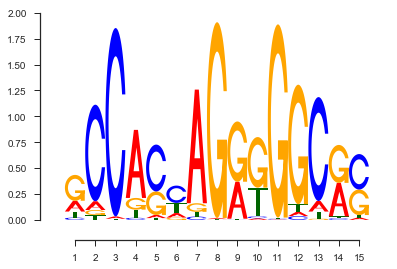

In [50]:
with open("./meme_out/meme.txt") as handle:
    m1 = motifs.parse(handle, "meme")
plot_motifLogo(m1[0])

In [53]:
m1[0].counts

{'A': [120, 38, 6, 378, 21, 66, 436, 3, 188, 10, 1, 16, 43, 223, 18],
 'C': [26, 419, 491, 12, 311, 252, 13, 0, 1, 11, 2, 14, 423, 11, 269],
 'G': [287, 22, 0, 65, 156, 34, 33, 495, 306, 305, 494, 442, 5, 253, 194],
 'T': [67, 21, 3, 45, 12, 148, 18, 2, 5, 174, 3, 28, 29, 13, 19]}

In [55]:
m1[0].pssm

{'A': [-0.058893689053568565,
  -1.7178567712185018,
  -4.380821783940931,
  1.5964581395589854,
  -2.5734668618833267,
  -0.9213901653036336,
  1.8024000401148395,
  -5.380821783940931,
  0.5888045670155504,
  -3.6438561897747253,
  -6.965784284662088,
  -2.965784284662087,
  -1.539519529959989,
  0.8351156152582178,
  -2.795859283219775],
 'C': [-2.2653445665209953,
  1.7450221490372646,
  1.9737949296526063,
  -3.380821783940931,
  1.3149864854685156,
  1.0114956388378296,
  -3.265344566520995,
  -inf,
  -6.965784284662088,
  -3.50635266602479,
  -5.965784284662088,
  -3.1584293626044833,
  1.7587295684578625,
  -3.50635266602479,
  1.1056780778945372],
 'G': [1.1991226420136007,
  -2.5063526660247897,
  -inf,
  -0.9434164716336324,
  0.3196179342001613,
  -1.8783214434117477,
  -1.9213901653036336,
  1.985500430304885,
  1.2916035580305647,
  1.2868811477881617,
  1.9825829469225906,
  1.8221182747293445,
  -4.643856189774724,
  1.0172092900322232,
  0.6341285575250407],
 'T': [-0.

In [60]:
m.counts

{'A': [0.220116,
  0.217988,
  0.215549,
  0.211712,
  0.206097,
  0.212003,
  0.21787,
  0.231774,
  0.22655,
  0.230736,
  0.187506,
  0.175929,
  0.186141,
  0.24702,
  0.244256,
  0.249292,
  0.178264,
  0.196967,
  0.190946,
  0.266843],
 'C': [0.276923,
  0.273013,
  0.273942,
  0.266865,
  0.272732,
  0.269271,
  0.271022,
  0.258298,
  0.281739,
  0.277578,
  0.381054,
  0.244888,
  0.27573,
  0.248822,
  0.2514,
  0.265678,
  0.267274,
  0.30813,
  0.291696,
  0.238138],
 'G': [0.275878,
  0.284896,
  0.287051,
  0.295881,
  0.305024,
  0.294144,
  0.294553,
  0.291505,
  0.28926,
  0.275243,
  0.297458,
  0.266789,
  0.343148,
  0.32192,
  0.310842,
  0.281704,
  0.272384,
  0.26013,
  0.275091,
  0.292511],
 'T': [0.227083,
  0.224103,
  0.223458,
  0.225542,
  0.216147,
  0.224582,
  0.216554,
  0.218422,
  0.202451,
  0.216443,
  0.133982,
  0.312393,
  0.194981,
  0.182237,
  0.193502,
  0.203326,
  0.282077,
  0.234772,
  0.242267,
  0.202508]}

In [63]:
for i in m.counts:
    m.counts[i] = (list(map(lambda x: x*1000,m.counts[i])))

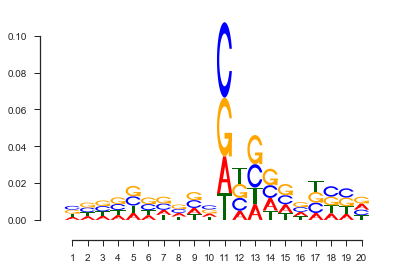

In [64]:
plot_motifLogo(m)

In [18]:
m.counts["A"] = list(pwm["A frequency"].values)
m.counts["C"] = list(pwm["C frequency"].values)
m.counts["T"] = list(pwm["T frequency"].values)
m.counts["G"] = list(pwm["G frequency"].values)

In [21]:
m.weblogo("Results/nuc_freq_plots/refseq.Info_200.png")

In [ ]:

>>> m.counts["A"]
[3, 7, 0, 2, 1]
but you can also think of it as a 2D array with the nucleotide as the first dimension and the position as the second dimension:

>>> m.counts["T", 0]
4
>>> m.counts["T", 2]
2
>>> m.counts["T", 3]
0
You can also directly access columns of the counts matrix

>>> m.counts[:, 3]
{'A': 2, 'C': 2, 'T': 0, 'G': 3}
Instead of the nucleotide itself, you can also use the index of the nucleotide in the sorted letters in the alphabet of the motif:

>>> m.alphabet
IUPACUnambiguousDNA()
>>> m.alphabet.letters
'GATC'
>>> sorted(m.alphabet.letters)
['A', 'C', 'G', 'T']
>>> m.counts["A",:]
(3, 7, 0, 2, 1)
>>> m.counts[0,:]
(3, 7, 0, 2, 1)
The motif has an associated consensus sequence, defined as the sequence of letters along the positions of the motif for which the largest value in the corresponding columns of the .counts matrix is obtained:

>>> m.consensus
Seq('TACGC', IUPACUnambiguousDNA())
as well as an anticonsensus sequence, corresponding to the smallest values in the columns of the .counts matrix:

>>> m.anticonsensus
Seq('GGGTG', IUPACUnambiguousDNA())
You can also ask for a degenerate consensus sequence, in which ambiguous nucleotides are used for positions where there are multiple nucleotides with high counts:

>>> m.degenerate_consensus
Seq('WACVC', IUPACAmbiguousDNA())
Here, W and R follow the IUPAC nucleotide ambiguity codes: W is either A or T, and V is A, C, or G [10]. The degenerate consensus sequence is constructed following the rules specified by Cavener [11].

We can also get the reverse complement of a motif:

>>> r = m.reverse_complement()
>>> r.consensus
Seq('GCGTA', IUPACUnambiguousDNA())
>>> r.degenerate_consensus
Seq('GBGTW', IUPACAmbiguousDNA())
>>> print(r)
TTGTA
GCGTA
GTGTA
GGGTA
GGGTT
GCATT
GCATT
<BLANKLINE>
The reverse complement and the degenerate consensus sequence are only defined for DNA motifs.

14.1.2  Creating a sequence logo
If we have internet access, we can create a weblogo:

>>> m.weblogo("mymotif.png")